In [18]:
import pandas as pd
from pathlib import Path
import numpy as np
import math
import scipy
from scipy.signal import find_peaks
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from urllib.request import urlopen
import json


In [19]:
file_path5 = 'GDP.csv'
df_GDP = pd.read_csv(file_path5, sep = ';',encoding='ISO-8859-1')
with urlopen('https://raw.githubusercontent.com/leakyMirror/map-of-europe/27a335110674ae5b01a84d3501b227e661beea2b/GeoJSON/europe.geojson') as response:
    europe_map = json.load(response)

file_path1 = 'GHG.csv'
df_GHG = pd.read_csv(file_path1, sep = ';',encoding='ISO-8859-1')


In [20]:
df_GDP = df_GDP.rename(columns={'ï»¿TIME': 'Country'})

for i in range(2000, 2023):
    if i == 2019 or i == 2020:
        continue
    else:
        df_GDP.drop(str(i), axis=1, inplace=True)

for i in range(0, 6):
    df_GDP.drop(i, axis=0, inplace=True)

for i in range(43, 46):
    df_GDP.drop(i, axis=0, inplace=True)

#df_GDP['2019'] = df_GDP['2019'].str.replace(',', '').astype(float)
#df_GDP['2020'] = df_GDP['2020'].str.replace(',', '').astype(float)

df_GDP['Country'] = df_GDP['Country'].replace('TÃ¼rkiye', 'Turkiye')

df_GDP.head()

,Country,2019,2020
6,Belgium,36.8,35.7
7,Bulgaria,16.6,16.6
8,Czechia,29.2,28.0
9,Denmark,39.5,39.9
10,Germany,37.9,37.0


In [21]:
#Filtering GHG data

df_GHG = df_GHG.rename(columns={'ï»¿TIME': 'Country'})

for i in range(2012,2022):
    if i == 2019 or i == 2020:
        continue
    else:
        df_GHG.drop(str(i), axis=1, inplace=True)

for i in range(0, 2):
    df_GHG.drop(i, axis=0, inplace=True)

# Replace commas with periods, then replace periods with nothing
df_GHG['2019'] = df_GHG['2019'].str.replace('.', '').str.replace(',', '.').astype(float)
df_GHG['2020'] = df_GHG['2020'].str.replace('.', '').str.replace(',', '.').astype(float)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Lithuania'),
  Text(1, 0, 'Malta'),
  Text(2, 0, 'Iceland'),
  Text(3, 0, 'Latvia'),
  Text(4, 0, 'Cyprus'),
  Text(5, 0, 'Slovenia'),
  Text(6, 0, 'Croatia'),
  Text(7, 0, 'Luxembourg'),
  Text(8, 0, 'Hungary'),
  Text(9, 0, 'Slovakia'),
  Text(10, 0, 'Norway'),
  Text(11, 0, 'Estonia'),
  Text(12, 0, 'Romania'),
  Text(13, 0, 'Ireland'),
  Text(14, 0, 'Denmark'),
  Text(15, 0, 'Sweden'),
  Text(16, 0, 'Bulgaria'),
  Text(17, 0, 'Switzerland'),
  Text(18, 0, 'Finland'),
  Text(19, 0, 'Austria'),
  Text(20, 0, 'Portugal'),
  Text(21, 0, 'Belgium'),
  Text(22, 0, 'Czechia'),
  Text(23, 0, 'Greece'),
  Text(24, 0, 'Poland'),
  Text(25, 0, 'Netherlands'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'France'),
  Text(28, 0, 'Spain'),
  Text(29, 0, 'Germany')])

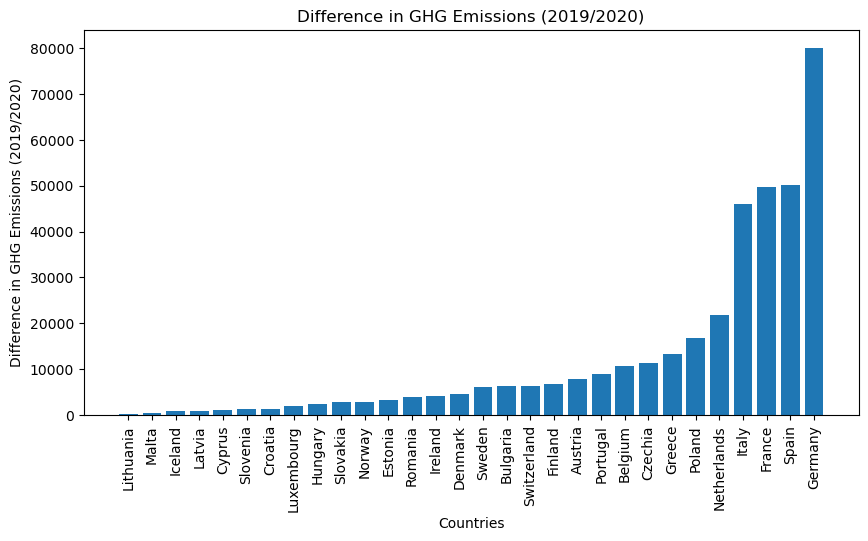

In [27]:
# Calculate the differences between 2019 and 2020
difference = df_GHG['2019'] - df_GHG['2020']

# Sort the data
sort_indices = np.argsort(difference)
countries_sorted = df_GHG['Country'].iloc[sort_indices]
difference_sorted = difference.iloc[sort_indices]

# Creating the bar plot
fig= plt.figure(figsize=(10, 5))
plt.bar(countries_sorted, difference_sorted)
plt.xlabel('Countries')
plt.ylabel('Difference in GHG Emissions (2019/2020)')
plt.title('Difference in GHG Emissions (2019/2020)')
plt.xticks(rotation=90)


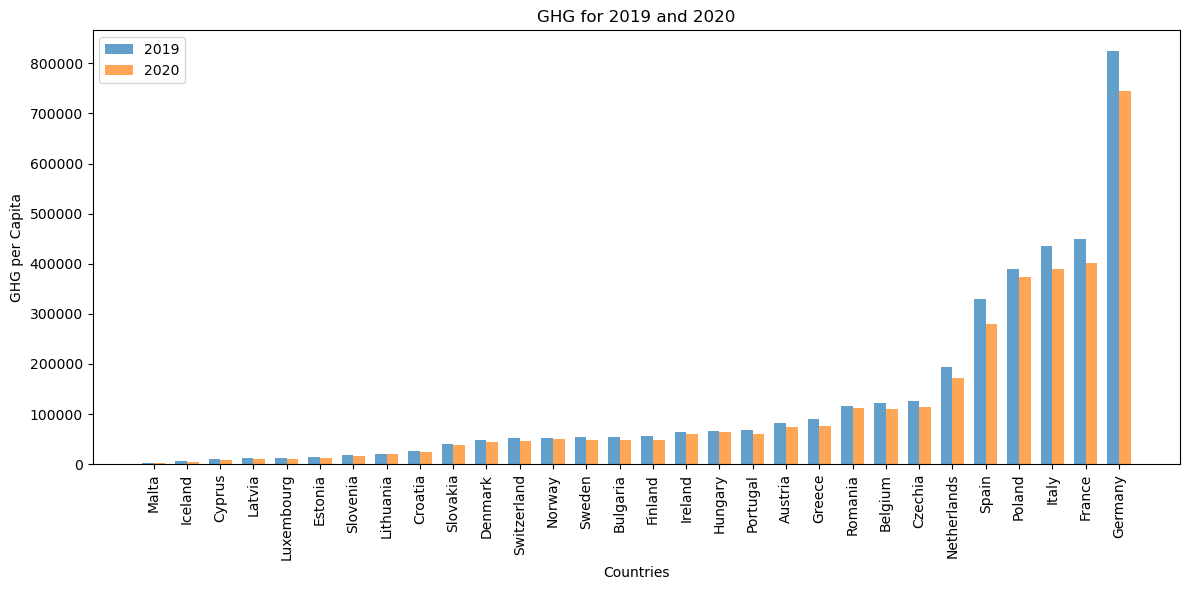

In [22]:
# Sample data
countries = df_GHG['Country']
ghg_2019 = df_GHG['2019']
ghg_2020 = df_GHG['2020']

# Sort data
sort_indices = np.argsort(ghg_2019)

countries_sorted = countries.iloc[sort_indices]
ghg_2019_sorted = ghg_2019.iloc[sort_indices]
ghg_2020_sorted = ghg_2020.iloc[sort_indices]

# Create an array of x values for the bar positions
x = np.arange(len(countries))

# Set the width of the bars
bar_width = 0.35

# Create the bar plot
fig= plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, ghg_2019_sorted, bar_width, label='2019', alpha=0.7)
plt.bar(x + bar_width/2, ghg_2020_sorted, bar_width, label='2020', alpha=0.7)

# Set the x-tick labels to be the country names
plt.xticks(x, countries_sorted, rotation=90)

# Set labels and title
plt.xlabel('Countries')
plt.ylabel('GHG per Capita')
plt.title('GHG for 2019 and 2020')
plt.legend()

plt.tight_layout()

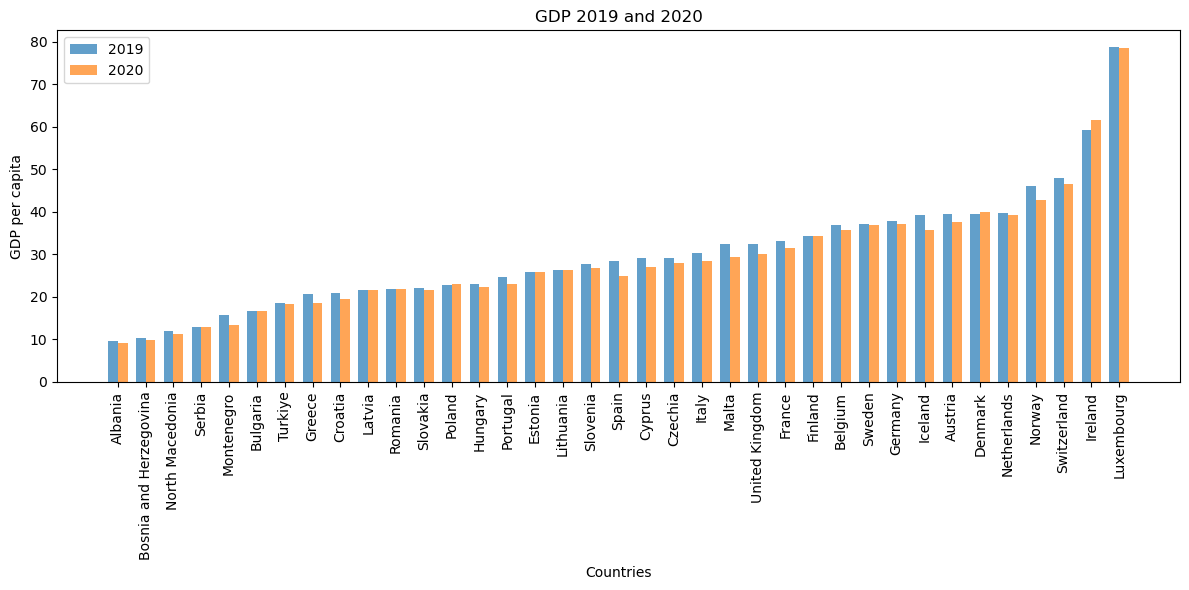

In [23]:
# Sample data
countries2 = df_GDP['Country']
gdp_2019 = df_GDP['2019']
gdp_2020 = df_GDP['2020']

# Sort the data in ascending order based on GDP for the year 2019
sorted_indices = np.argsort(gdp_2019)

countries2 = countries2.iloc[sorted_indices]
gdp_2019 = gdp_2019.iloc[sorted_indices]
gdp_2020 = gdp_2020.iloc[sorted_indices]

# Create an array of x values for the bar positions
x = np.arange(len(countries2))

# Set the width of the bars
bar_width = 0.35

# Create the bar plot
fig = plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, gdp_2019, bar_width, label='2019', alpha=0.7)
plt.bar(x + bar_width/2, gdp_2020, bar_width, label='2020', alpha=0.7)

# Set the x-tick labels to be the country names
plt.xticks(x, countries2, rotation=90)

# Set labels and title
plt.xlabel('Countries')
plt.ylabel('GDP per capita')
plt.title('GDP 2019 and 2020')
plt.legend()

plt.tight_layout()
plt.show()
fig.savefig('GDP19v20.png')


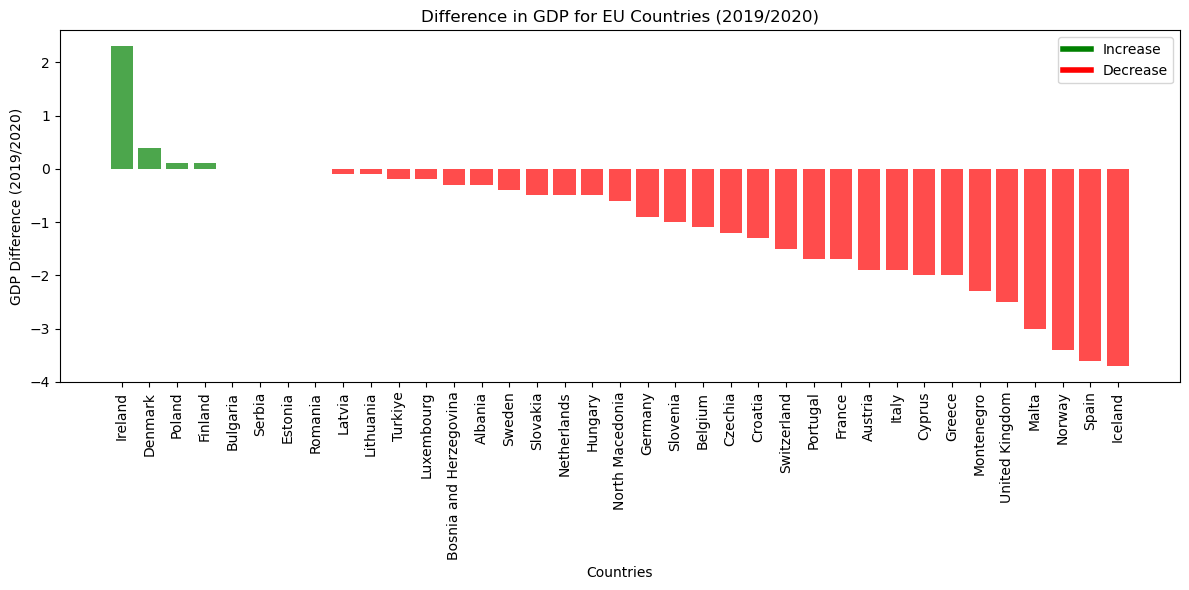

In [24]:
# Calculate the GDP difference for each country
df_GDP['GDP Difference'] = df_GDP['2020'] - df_GDP['2019']

# Create a new DataFrame containing only the relevant columns
df_GDP_difference = df_GDP[['Country', 'GDP Difference']]

# Sort the data by the GDP difference in descending order
df_GDP_difference = df_GDP_difference.sort_values(by='GDP Difference', ascending=False)

# Create a bar plot with green and red bars
fig = plt.figure(figsize=(12, 6))
colors = ['green' if x >= 0 else 'red' for x in df_GDP_difference['GDP Difference']]
bars = plt.bar(df_GDP_difference['Country'], df_GDP_difference['GDP Difference'], color=colors, alpha=0.7)

# Add a legend with colored labels
increase_bar = plt.Line2D([0], [0], color='green', lw=4)
decrease_bar = plt.Line2D([0], [0], color='red', lw=4)
plt.legend([increase_bar, decrease_bar], ['Increase', 'Decrease'])

plt.xlabel('Countries')
plt.ylabel('GDP Difference (2019/2020)')
plt.title('Difference in GDP for EU Countries (2019/2020)')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the bar plot
plt.show()
fig.savefig('GDPdifference.png')

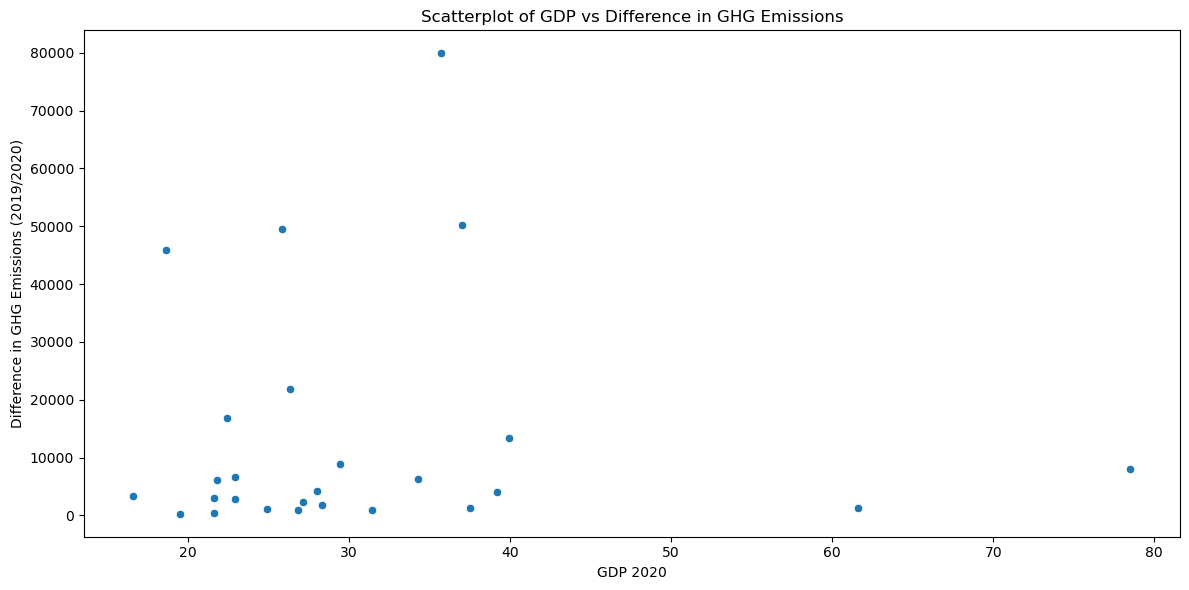

In [28]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Create a DataFrame for GDP and GHG difference
gdp_df = pd.DataFrame({
    'Country': countries_sorted,
    'GDP 2019': gdp_2019,
    'GDP 2020': gdp_2020
})

ghg_df = pd.DataFrame({
    'Country': countries_sorted,
    'Difference in GHG Emissions (2019/2020)': difference_sorted
})

# Merge the two DataFrames on the 'Country' column
merged_data = pd.merge(gdp_df, ghg_df, on='Country')

# Create a scatterplot
fig = plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='GDP 2020', y='Difference in GHG Emissions (2019/2020)')

# Add labels and title
plt.xlabel('GDP 2020')
plt.ylabel('Difference in GHG Emissions (2019/2020)')
plt.title('Scatterplot of GDP vs Difference in GHG Emissions')

# Show the plot
plt.tight_layout()
plt.show()
fig.savefig('ScatterGDPGHG.png')

Codes that we might work on, but maybe not

In [ ]:
# Create a choropleth map

# Create a choropleth map
fig = px.choropleth(
    df_GDP_difference,
    geojson=europe_map,
    locations='Country',
    featureidkey="properties.name",
    color='GDP Difference',
    color_continuous_scale="Viridis",
    range_color=(min(df_GDP_difference['GDP Difference']), max(df_GDP_difference['GDP Difference'])),
    labels={'GDP Difference': 'GDP Difference'},
)

fig.update_geos(
    visible=False,
    projection_type="mercator"
)

fig.update_layout(
    title='Difference in GDP for EU Countries (2019/2020)',
    geo=dict(
        showcoastlines=True,
        showland=True,
        landcolor="white",
        scope="europe"  # Set the map scope to "europe"
    ),
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)

fig.show()

In [29]:
# Define the group boundaries based on GDP values from 2020
group_boundaries = [0, 25, 50, float('inf')]  # Adjust the boundaries as needed

# Create labels for the groups
group_labels = ['Low GDP', 'Medium GDP', 'High GDP']

# Use numpy's digitize function to assign countries to groups
group_assignment = np.digitize(gdp_2020, group_boundaries)

# Initialize empty lists for each group
low_gdp_countries = []
medium_gdp_countries = []
high_gdp_countries = []

# Populate the lists based on group assignment
for i, group in enumerate(group_assignment):
    if group == 1:
        low_gdp_countries.append(countries2.iloc[i])
    elif group == 2:
        medium_gdp_countries.append(countries2.iloc[i])
    elif group == 3:
        high_gdp_countries.append(countries2.iloc[i])

# Print the countries in each group
print("Low GDP Countries:")
print(low_gdp_countries)

print("\nMedium GDP Countries:")
print(medium_gdp_countries)

print("\nHigh GDP Countries:")
print(high_gdp_countries)

Low GDP Countries:
['Albania', 'Bosnia and Herzegovina', 'North Macedonia', 'Serbia', 'Montenegro', 'Bulgaria', 'Turkiye', 'Greece', 'Croatia', 'Latvia', 'Romania', 'Slovakia', 'Poland', 'Hungary', 'Portugal', 'Spain']

Medium GDP Countries:
['Estonia', 'Lithuania', 'Slovenia', 'Cyprus', 'Czechia', 'Italy', 'Malta', 'United Kingdom', 'France', 'Finland', 'Belgium', 'Sweden', 'Germany', 'Iceland', 'Austria', 'Denmark', 'Netherlands', 'Norway', 'Switzerland']

High GDP Countries:
['Ireland', 'Luxembourg']
